# 손글씨(필기체) 숫자 인식

- ### 데이터
    - #### 8x8 픽셀 숫자
    - #### 데이터 수 : 5620개

In [1]:
import cv2
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [2]:
digits = datasets.load_digits()

In [14]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

### 2번째 이미지 출력

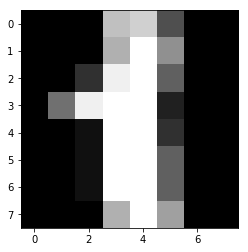

In [3]:
plt.imshow(digits.images[1], cmap="gray")
plt.show()

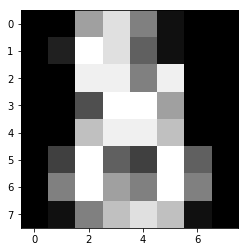

In [4]:
plt.imshow(digits.images[1796], cmap="gray")

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.images.shape

(1797, 8, 8)

### 첫번째 이미지의 내용 확인

In [21]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


## 이미지 데이터의 구성
- #### 데이터의 형태 : 8 * 8
- #### 각 픽셀은 0~15의 숫자
- #### 값이 크면 --> 밝은 색

### 맨 앞의 총 15개의 숫자 데이터를 읽어 이미지로 표현

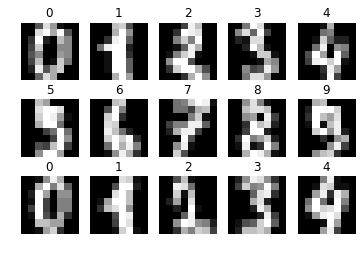

In [22]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")

plt.show()

## 숫자 이미지 인식
- ### 8*8 2차원 이미지 --> 64 크기의 1차원 벡터로 보고 숫자 인식
- ### 좋은 방법은 아니다

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

### 훈련 데이터 구성
- #### 입력 특징 데이터 (X) : 64 크기의 1차원 벡터로 변환
- #### 목적 변수 (y)

In [25]:
x = digits.images
x = x.reshape((-1, 64))

In [26]:
y = digits.target

In [27]:
x_tt_rain, x_test, y_train, y_test = train_tessplit(x, y, test_size=0.25)

### 학습
- #### SVM이 제공하는 SVC 사용

In [28]:
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

C:\Users\ojkwon\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [35]:
clf = svm.LinearSVC(max_iter=10000)
clf.fit(x_train, y_train)

C:\Users\ojkwon\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### 예측

In [36]:
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9555555555555556


### (참고) 
- 일반 텍스트를 파일로 저장할 때는 파일 입출력을 이용한다.
- 하지만 리스트나 클래스같은 텍스트가 아닌 자료형은 일반적인 파일 입출력 방법으로는 데이터를 저장하거나 불러올 수 없다.
- 파이썬에서는 이와 같은 텍스트 이외의 자료형을 파일로 저장하기 위하여 pickle이라는 모듈을 제공한다.
- pickle로 데이터를 저장하거나 불러올때는 파일을 바이트형식으로 읽거나 써야한다. (wb, rb)
- wb로 데이터를 입력하는 경우는 .bin 확장자를 사용하는게 좋다.
- 모든 파이썬 데이터 객체를 저장하고 읽을 수 있다.

#### (일반적인 사용법)
- import pickle
- pickle.dump(data, file)
- pickle.load(file)

### 학습한 모델 파라미터를 digits.pkl 파일에 피클(pickle) 형식으로 저장
- #### 피클(pickle) 형식 :임의의 데이터 묶음을 하나의 파일로 저장
    - 피클처럼 오래 저장한다는 의미를 가짐
    - joblib.dump()
    - joblib.load()

In [38]:
# 학습한 데이터 저장하기
from sklearn.externals import joblib
joblib.dump(clf, 'digits.pkl')

['digits.pkl']

#### (Tips)파이썬 연산자
- // : 몫
- % : 나머지

### 1. 학습한 모델 데이터 읽어 들인다
### 2. 인식할 데이터 파일을 읽어 들인다.
### 3. 인식할 데이터를 전처리
- #### gray 스케일로 변환
- #### 8 * 8 크기로 변환
- #### 흑백 반전
- #### 2차원 데이터를 1차원 벡터로 변환

### 4. 인식 수행

In [42]:
def predict_digit(filename):
  # 학습한 데이터 읽어 들이기
    model = joblib.load("digits.pkl")
    
    my_img = cv2.imread(filename)
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16         # 흑백 반전
    my_img = my_img.reshape((-1, 64))
    
    res = model.predict(my_img)
    
    return res[0]

### 인식 대상 데이터 준비
- #### 웹에서 이미지 파일(손글씨)을 지정해서 실행하기
- #### 미리보기에서 클립보드에서 파일로 저장 실행
- #### 임의의 이미지 편집기를 사용하여 저장

digit2.png = 2


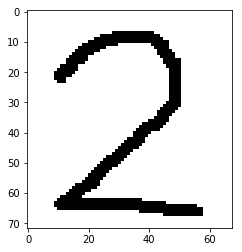

In [43]:
img = cv2.imread("digit2.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

n = predict_digit("digit2.png")
print("digit2.png = " + str(n))

plt.show()

digit9.png = 7


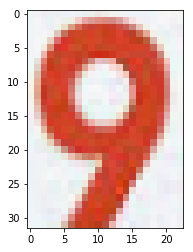

In [44]:
img = cv2.imread("digit9.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

n = predict_digit("digit9.png")
print("digit9.png = " + str(n))

plt.show()

digit6.png = 3


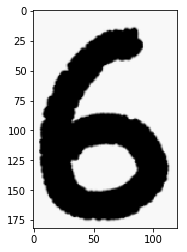

In [45]:
img = cv2.imread("digit6.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

n = predict_digit("digit6.png")
print("digit6.png = " + str(n))

plt.show()

- 데이터를 아주 작은 사이즈(8*8)로 resize함으로 인해 정보를 많이 잃어버린다. 
- 글자가 중앙에 있지 않은 경우는 잘 인식하지 못한다. 
- 이는 SVM 알고리즘의 한계
- 이러한 문제들은 향후 딥러닝을 사용하면 해결된다.